# Pronostico con modelos del clima

In [1]:
import matplotlib.pyplot as plt

# built in python modules
import datetime
import os

# python add-ons
import numpy as np
import pandas as pd

# for accessing UNIDATA THREDD servers
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS

import pvlib
from pvlib.forecast import GFS, HRRR_ESRL, NAM, NDFD, HRRR, RAP

/Users/luisvargas/Desktop/Tesis Pvlib/env_pvlib_tesis/lib/python3.8/site-packages/pvlib/forecast.py:18: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  warnings.warn(


In [2]:
# Choose a location and time.
# Tucson, AZ
latitude = 20.56
longitude = -103.22 
tz = 'America/Mexico_City'

start = pd.Timestamp(datetime.date.today(), tz=tz) # today's date
end = start + pd.Timedelta(days=5) # 5 days from today
print(start, end)

2020-11-18 00:00:00-06:00 2020-11-23 00:00:00-06:00


###  GFS

In [3]:
from pvlib.forecast import GFS, HRRR_ESRL, NAM, NDFD, HRRR, RAP 

In [5]:
# GFS model, defaults to 0.5 degree resolution
fm = GFS()

    GFS(ForecastModel)
    Subclass of the ForecastModel class representing GFS
    forecast model.

    Model data corresponds to 0.25 degree resolution forecasts.

    Parameters
    ----------
    resolution: string, default 'half'
        Resolution of the model, either 'half' or 'quarter' degree.
    set_type: string, default 'best'
        Type of model to pull data from.

    Attributes
    ----------
    dataframe_variables: list
        Common variables present in the final set of data.
    model: string
        Name of the UNIDATA forecast model.
    model_type: string
        UNIDATA category in which the model is located.
    variables: dict
        Defines the variables to obtain from the weather
        model and how they should be renamed to common variable names.
    units: dict
        Dictionary containing the units of the standard variables
        and the model specific variables.

In [6]:
#Conseguir los datos para el sitio dado
data = fm.get_data(latitude, longitude, start, end)

In [7]:
data[sorted(data.columns)]

,Downward_Short-Wave_Radiation_Flux_surface_Mixed_intervals_Average,Temperature_surface,Total_cloud_cover_boundary_layer_cloud_Mixed_intervals_Average,Total_cloud_cover_convective_cloud,Total_cloud_cover_entire_atmosphere_Mixed_intervals_Average,Total_cloud_cover_high_cloud_Mixed_intervals_Average,Total_cloud_cover_low_cloud_Mixed_intervals_Average,Total_cloud_cover_middle_cloud_Mixed_intervals_Average,Wind_speed_gust_surface,u-component_of_wind_isobaric,v-component_of_wind_isobaric
2020-11-18 06:00:00-06:00,0.0,287.128113,0.0,0.0,71.0,0.0,0.0,71.0,5.206022,-2.007612,-1.797766
2020-11-18 09:00:00-06:00,0.0,285.222260,0.0,0.0,0.0,0.0,0.0,0.0,3.139489,-1.374233,-1.696045
2020-11-18 12:00:00-06:00,0.0,283.192688,0.0,0.0,0.0,0.0,0.0,0.0,1.745710,-1.140327,-0.905510
2020-11-18 15:00:00-06:00,110.0,290.655945,0.0,0.0,0.0,0.0,0.0,0.0,5.908060,-2.391838,-1.525327
2020-11-18 18:00:00-06:00,370.0,300.209381,0.0,0.0,4.0,2.0,1.0,0.0,8.207712,-5.273015,0.008474
2020-11-18 21:00:00-06:00,770.0,302.085022,0.0,0.0,0.0,0.0,0.0,0.0,5.841095,-4.173291,1.105630
2020-11-19 00:00:00-06:00,544.0,292.916504,0.0,0.0,0.0,0.0,0.0,0.0,4.848943,-2.793315,-0.857329
2020-11-19 03:00:00-06:00,0.0,289.119690,0.0,0.0,2.0,2.0,0.0,1.0,4.441881,-2.815664,-0.820938
2020-11-19 06:00:00-06:00,0.0,286.902008,0.0,0.0,1.0,1.0,0.0,0.0,2.902618,-1.836731,-1.698206
2020-11-19 09:00:00-06:00,0.0,284.434235,0.0,0.0,0.0,0.0,0.0,0.0,3.300265,-1.446221,-1.730061


In [8]:
data = fm.process_data(data)

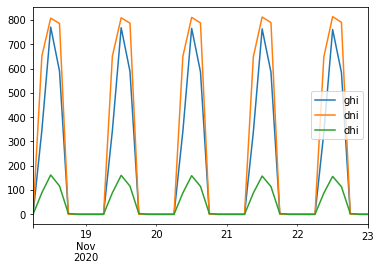

In [9]:
data[['ghi', 'dni', 'dhi']].plot();

In [11]:
#modelo de cielo despejado
cs = fm.location.get_clearsky(data.index)

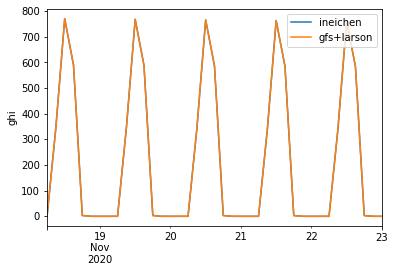

In [12]:
fig, ax = plt.subplots()
cs['ghi'].plot(ax=ax, label='ineichen')
#Larson et. al. "Day-ahead forecasting of solar power output from photovoltaic plants in the American Southwest" Renewable Energy91, 11-20 (2016).
data['ghi'].plot(ax=ax, label='gfs+larson')
ax.set_ylabel('ghi')
ax.legend();

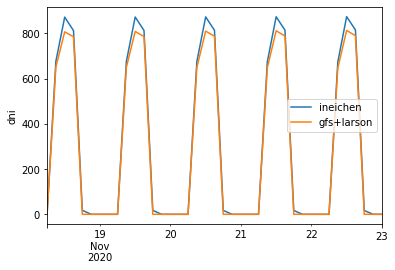

In [15]:
fig, ax = plt.subplots()
cs['dni'].plot(ax=ax, label='ineichen')
data['dni'].plot(ax=ax, label='gfs+larson')
ax.set_ylabel('dni')
ax.legend();

In [16]:
#Datos obtenidos y procesados
data = fm.get_processed_data(latitude, longitude, start, end)

In [17]:
data[sorted(data.columns)]

,dhi,dni,ghi,high_clouds,low_clouds,mid_clouds,temp_air,total_clouds,wind_speed
2020-11-18 06:00:00-06:00,0.000000,0.000000,0.000000,0.0,0.0,71.0,13.978119,71.0,2.694897
2020-11-18 09:00:00-06:00,88.962554,651.771001,346.687678,0.0,0.0,0.0,12.072266,0.0,2.182908
2020-11-18 12:00:00-06:00,161.941824,807.317564,770.373375,0.0,0.0,0.0,10.042694,0.0,1.456123
2020-11-18 15:00:00-06:00,116.716175,785.248544,589.401393,0.0,0.0,0.0,17.505951,0.0,2.836814
2020-11-18 18:00:00-06:00,3.198625,0.000000,3.198625,2.0,1.0,0.0,27.059387,4.0,5.273022
2020-11-18 21:00:00-06:00,0.000000,0.000000,0.000000,0.0,0.0,0.0,28.935028,0.0,4.317265
2020-11-19 00:00:00-06:00,0.000000,0.000000,0.000000,0.0,0.0,0.0,19.766510,0.0,2.921921
2020-11-19 03:00:00-06:00,0.000000,0.000000,0.000000,2.0,0.0,1.0,15.969696,2.0,2.932900
2020-11-19 06:00:00-06:00,0.000000,0.000000,0.000000,1.0,0.0,0.0,13.752014,1.0,2.501496
2020-11-19 09:00:00-06:00,88.481066,650.643739,343.952733,0.0,0.0,0.0,11.284241,0.0,2.254920


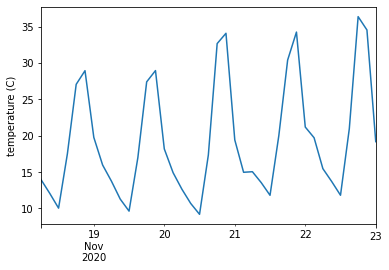

In [18]:
data['temp_air'].plot()
plt.ylabel('temperature (%s)' % fm.units['temp_air']);

In [19]:
#Variables de nubosidad
cloud_vars = ['total_clouds', 'low_clouds', 'mid_clouds', 'high_clouds']

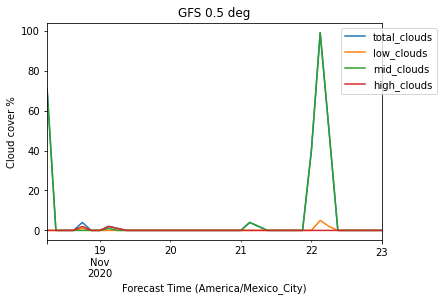

In [20]:
for varname in cloud_vars:
    data[varname].plot()
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.5 deg')
plt.legend(bbox_to_anchor=(1.18,1.0));

In [21]:
total_cloud_cover = data['total_clouds']

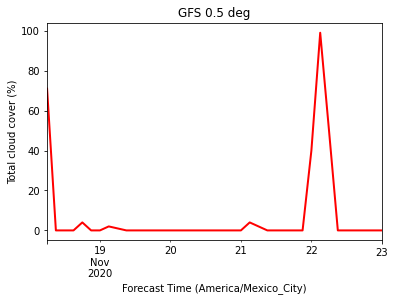

In [24]:
total_cloud_cover.plot(color='r', linewidth=2)
plt.ylabel('Total cloud cover' + ' (%s)' % fm.units['total_clouds'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.5 deg');